In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np

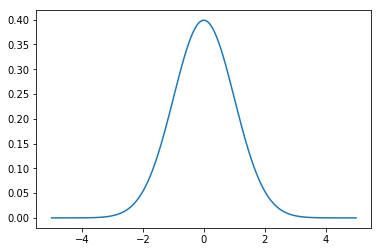

In [13]:
x = np.linspace(-5, 5, 5000)
y = math.e**(-x**2/2)/math.sqrt(2*math.pi)
plt.plot(x, y);

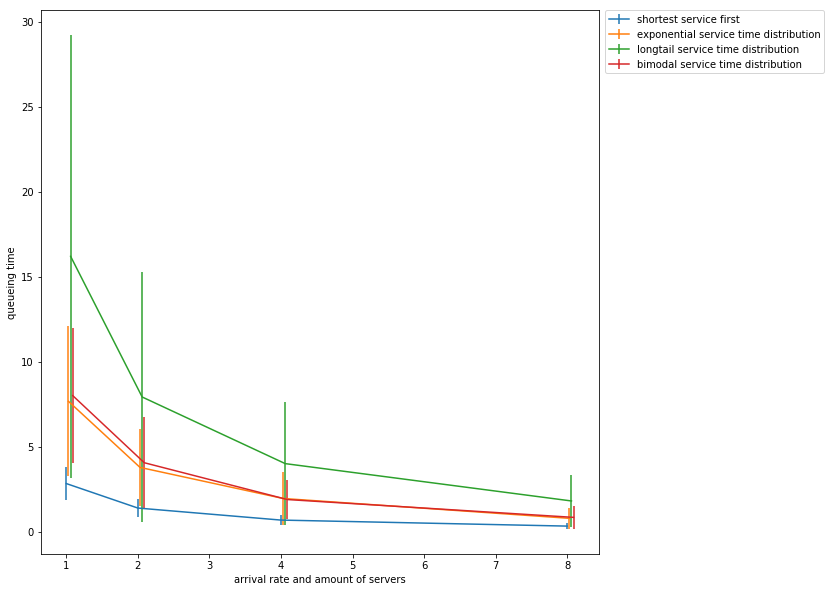

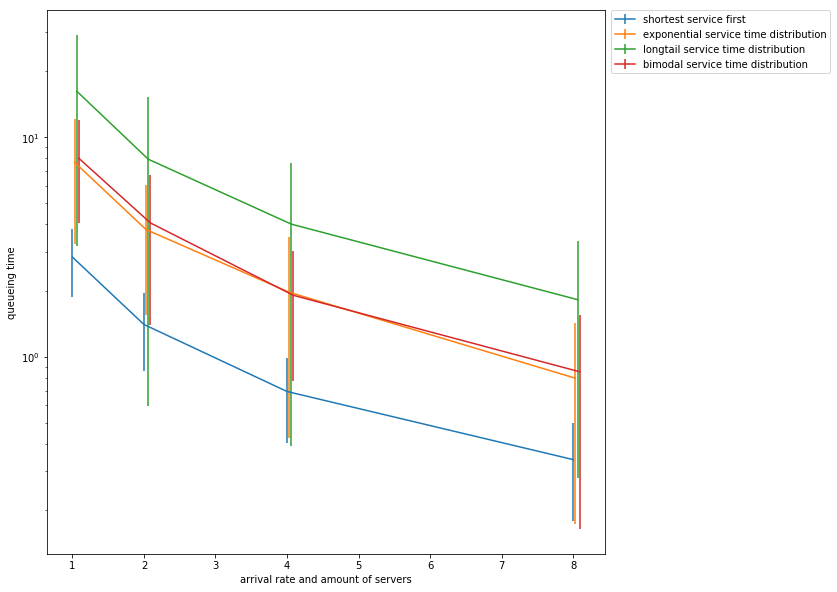

In [52]:
# waiting time, standard plot of the mean and standard devation
labelList = ['shortest service first','exponential arrival rate','longtail arrival rate','bimodal arrival rate']
mean = [[2.841221013, 1.400890185, 0.69350736, 0.339385279],\
       [7.678722591, 3.791439864, 1.964056561, 0.797141592],\
       [16.20597471, 7.932737018, 4.013875002, 1.81809191],\
       [8.012524125, 4.066038797, 1.901449905, 0.853037081]]
std = [[0.981164412, 0.541011425, 0.291348148, 0.160724502],\
      [4.402575851, 2.251030331, 1.536606596, 0.624683194],\
      [13.02192423, 7.339213758, 3.620503599, 1.537769241],\
      [3.965794185, 2.676276868, 1.123280653, 0.689305222]]

# create slight room in the x axis to be able to see the standard deviations
plots = len(labelList)
LambdaAndN = [[1,2,4,8]]
for plotNumber in range(plots - 1):
    LambdaAndN.append([])
    for serviceTimeAndServer in LambdaAndN[0]:
        LambdaAndN[plotNumber + 1].append(serviceTimeAndServer + 0.03*(plotNumber + 1))

# plot with normal axes        
plt.figure(figsize=(10,10))
for plot in range(plots):
    plt.errorbar(LambdaAndN[plot], mean[plot], yerr = std[plot], label  = labelList[plot])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('arrival rate and amount of servers')
plt.ylabel('queueing time')
plt.show();

# plot with logarithmic y axis
plt.figure(figsize=(10,10))
for plot in range(plots):
    plt.errorbar(LambdaAndN[plot], mean[plot], yerr = std[plot], label  = labelList[plot])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('arrival rate and amount of servers')
plt.ylabel('queueing time')
plt.yscale("log")
plt.show();

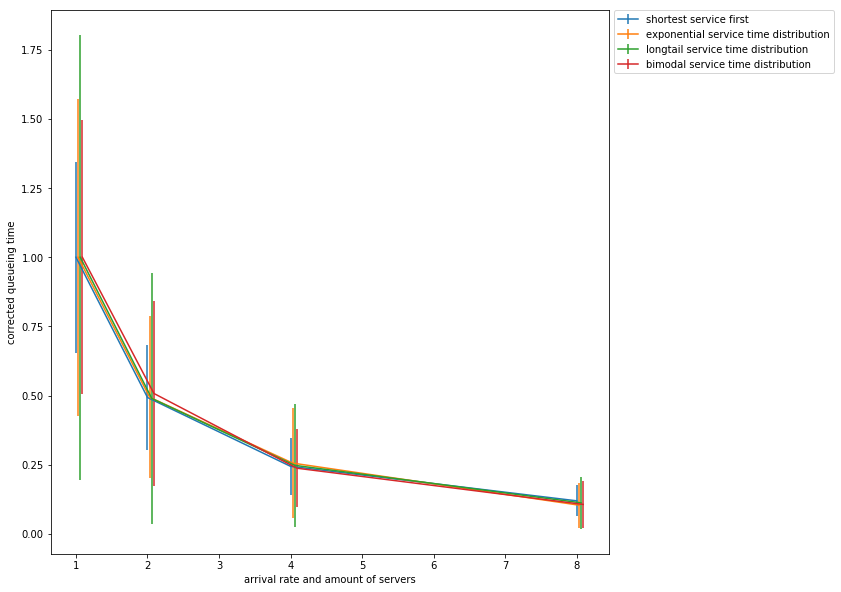

In [53]:
# waiting time, relative to waiting time for a shop with a single server
labelList = ['shortest service first','exponential service time distribution','longtail service time distribution','bimodal service time distribution']
mean = [[2.841221013, 1.400890185, 0.69350736, 0.339385279],\
       [7.678722591, 3.791439864, 1.964056561, 0.797141592],\
       [16.20597471, 7.932737018, 4.013875002, 1.81809191],\
       [8.012524125, 4.066038797, 1.901449905, 0.853037081]]
std = [[0.981164412, 0.541011425, 0.291348148, 0.160724502],\
      [4.402575851, 2.251030331, 1.536606596, 0.624683194],\
      [13.02192423, 7.339213758, 3.620503599, 1.537769241],\
      [3.965794185, 2.676276868, 1.123280653, 0.689305222]]

# create slight room in the x axis to be able to see the standard deviations
plots = len(labelList)
LambdaAndN = [[1,2,4,8]]
for plotNumber in range(plots - 1):
    LambdaAndN.append([])
    for serviceTimeAndServer in LambdaAndN[0]:
        LambdaAndN[plotNumber + 1].append(serviceTimeAndServer + 0.03*(plotNumber + 1))

# scale the mean to the mean at 1 server        
correctedMean = []
for plot in range(plots):
    correctedMean.append([])
    for number in range(plots):
        #print correctedMean[plot][number],'/',mean[plot][0]
        correctedMean[plot].append(mean[plot][number]/mean[plot][0])

# scale the standard deviation to the std at 1 server        
correctedStd = []
for plot in range(plots):
    correctedStd.append([])
    for number in range(plots):
        #print correctedMean[plot][number],'/',mean[plot][0]
        correctedStd[plot].append(std[plot][number]/mean[plot][0])        
        
plt.figure(figsize=(10,10))
for plot in range(plots):
    plt.errorbar(LambdaAndN[plot], correctedMean[plot], yerr = correctedStd[plot], label  = labelList[plot])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('arrival rate and amount of servers')
plt.ylabel('corrected queueing time')
plt.show();